# How to know the Fast Fourier Transform in your software is working correctly?

We propose in this small notebook a simple test to check that the FFT that you are using is doing what you expect. One possible reason to obtain wrong results when programming and using libraries, is that few times we check completely how the library is calculating our results. One sloution is to read the documentation and understand the mathematic model used. Or other is create an example that we know the result and compare against the program.

For this we propose to obtain the Fourier Transform of a sinusoidal wave. Or as it is the case here, the signal is periodical so we will see to the Fourier Series somponents
$$x=sin(2 \pi f t + \phi)$$




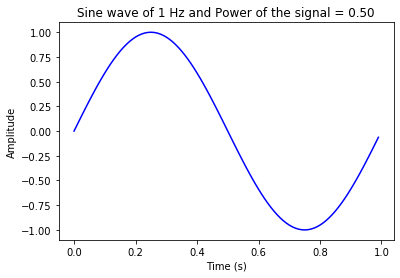

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# First give the parameters for the sinusoidal wave to evaluate in the FFT
f = 1       # Frequency
Fs = 100    # Sampling frequency
Ts = 1.0/Fs # Sampling period
phi = 0    # Phase in degrees
endTime = 1 # Total time of the signal 
# Remember to have a complete number of cycles endTime*f=nb of cycles
t = np.arange(0, endTime, Ts)
x = np.sin(2*np.pi*f*t + phi*np.pi/180)

n = len(x) # length of the signal
power = np.sum(abs(x)**2)/n # power of the signal

fig_sine_wave, ax_sine_wave = plt.subplots(1,1)
line, = ax_sine_wave.plot(t, x, 'b')
ax_sine_wave.set_xlabel("Time (s)")
ax_sine_wave.set_ylabel("Amplitude")
ax_sine_wave.title.set_text('Sine wave of {} Hz and Power of the signal = {:.2f}'.format(f, power))

The sinusoidal signal can be expressed as a linear sum of exponential values.

$$ sin(2 \pi f t + \phi) = \frac{(e^{j 2 \pi  f t}-e^{- j 2 \pi f t})}{(2j)} $$

In the Fourier Series we know as de *synthezis* equation

$$ x(t) = \sum^{\infty}_{k=-\infty} a_k e^{j k 2 \pi f t}$$

and the *analytical* equation to find the coefficients

$$ a_k = \frac{1}{T} \int_T x(t) e^{j k 2 \pi f t}$$

Using the linear combination of the xomplex exponentials of the sine, we can compare to the analytical equation and find the coefficients.

$$ a_1 = \frac{1}{2j} = \frac{-j}{2} $$
$$ a_{-1} = \frac{-1}{2j} = \frac{j}{2}$$
$$ a_0 = 0$$

And there are no other components. What we can see from this result for the sine wave is that bith components are in the imaginary plane, so first of all we can verify this by plotting the FFT of the sine wave. We observe that there are only 2 spikes in the $\Im$ plane, the coefficient $a_1$ is negative and $a_{-1}$ is positive. The values of the $\Re$ plane are very small compared to the $\Im$ plane.

We expect from a Sinewave a power of $$P = A^2 /2$$
In our case with $A=1$ the power should be $0.5$

We can observe that the spikes are at $0.25$ this means that if we add both we obtain the complete power. Therefore it is needed in the calculation of the FFT to apply the normalization of the number of values of the signal.

Text(0, 0.5, '$\\Im$(X)')

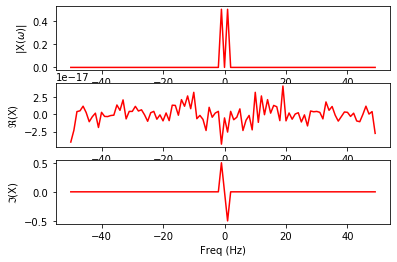

In [4]:
freq_array = np.fft.fftfreq(n, 1.0/Fs)
freq_array_shift = np.fft.fftshift(freq_array)

X = np.fft.fftshift(np.fft.fft(x))/n # fft computing and normalization

fig, ax = plt.subplots(3, 1)
ax[0].plot(freq_array_shift,abs(X),'r') # plotting the spectrum
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|X($\omega$)|')
ax[1].plot(freq_array_shift,np.real(X),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('$\Re$(X)')
ax[2].plot(freq_array_shift,np.imag(X),'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('$\Im$(X)')

Now this example will let you playwith the values of the frequency and the phase of the signal. Notice that if there are no a complete number of cycles in the signal we will start to see some disperssion of the energy in to sidebands.

<IPython.core.display.Javascript object>


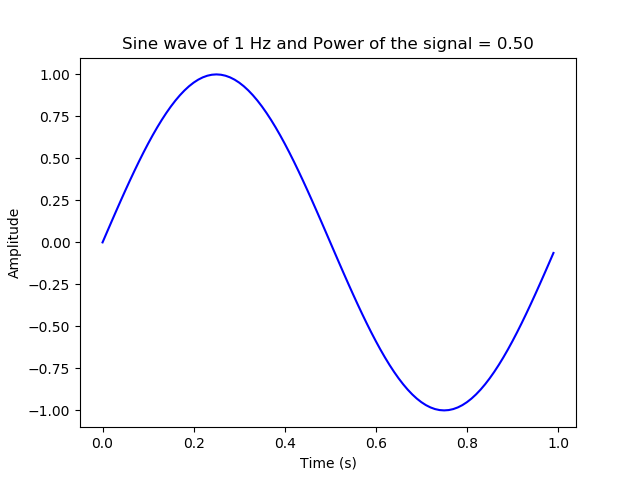

<IPython.core.display.Javascript object>


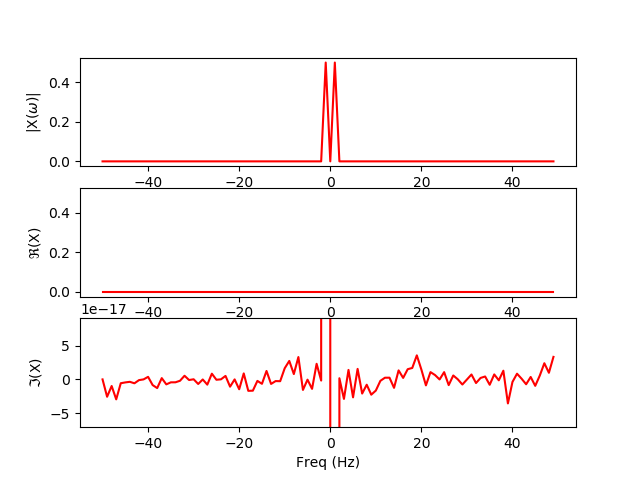

interactive(children=(FloatSlider(value=1.0, description='f', max=10.0, min=1.0), IntSlider(value=0, descripti…

In [13]:
%matplotlib notebook 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# First give the parameters for the sinusoidal wave to evaluate in the FFT
f = 1       # Frequency
Fs = 100    # Sampling frequency
Ts = 1.0/Fs # Sampling period
phi = 90    # Phase in degrees
endTime = 1 # Total time of the signal 
# Remember to have a complete number of cycles endTime*f=nb of cycles
t = np.arange(0, endTime, Ts)
x = np.sin(2*np.pi*f*t + phi*np.pi/180)

n = len(x) # length of the signal
power = np.sum(abs(x)**2)/n # power of the signal


fig_sine_wave, ax_sine_wave = plt.subplots(1,1)
line, = ax_sine_wave.plot(t, x, 'b')
ax_sine_wave.set_xlabel("Time (s)")
ax_sine_wave.set_ylabel("Amplitude")
ax_sine_wave.title.set_text('Sine wave of {} Hz and Power of the signal = {:.2f}'.format(f, power))

freq_array = np.fft.fftfreq(n, 1.0/Fs)
freq_array_shift = np.fft.fftshift(freq_array)

X = np.fft.fftshift(np.fft.fft(x))/n # fft computing and normalization

fig, ax = plt.subplots(3, 1)
lineax0, = ax[0].plot(freq_array_shift,abs(X),'r') # plotting the spectrum
ax[0].set_xlabel('Freq (Hz)')
ax[0].set_ylabel('|X($\omega$)|')
lineax1, = ax[1].plot(freq_array_shift,np.real(X),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('$\Re$(X)')
lineax2, = ax[2].plot(freq_array_shift,np.imag(X),'r') # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('$\Im$(X)')

def update(f, phi):
    x = np.sin(2*np.pi*f*t + phi*np.pi/180)
    line.set_ydata(x)
    fig_sine_wave.canvas.draw_idle()
    
    freq_array = np.fft.fftfreq(n, 1.0/Fs)
    freq_array_shift = np.fft.fftshift(freq_array)

    X = np.fft.fftshift(np.fft.fft(x))/n # fft computing and normalization
    lineax0.set_ydata(abs(X))
    lineax1.set_ydata(np.real(X))
    lineax2.set_ydata(np.imag(X))
    fig.canvas.draw_idle()
    
    

#interact(update);

interact(update, 
         f=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
         phi=widgets.IntSlider(min=0, max=259, step=1, value=0));